In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model
import numpy as np

In [2]:
# read the kinetic results obtained at specific concentration and temperature e.g., 200ppm and 25oC
df = pd.read_csv('adsorption_kinetics.csv')

# define x and y column
xData = df.loc[:, 'minutes']
yData = df.loc[:, 'qt']

In [3]:
# fitting function PFO
param_names = ['k1 in (min-1)', 'qmax in (mg/g)']

def PFO(x, k1, qmax):
    return qmax*(1-np.exp(-k1*x))

my_model = Model(PFO)
my_model.set_param_hint('k1', min=0, max=100)
my_model.set_param_hint('qmax', min=0, max=100)

result_PFO = my_model.fit(yData, x=xData, k1=0, qmax=50)

x_eval = np.linspace(min(xData), max(xData), 200)

best_values_PFO = result_PFO.best_values
best_fit = result_PFO.best_fit
best_PFO = np.array(PFO(x_eval, best_values_PFO['k1'], best_values_PFO['qmax']))

print(result_PFO.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_PFO)

[[Model]]
    Model(PFO)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 2156
    # variables        = 2
    chi-square         = 13354.6692
    reduced chi-square = 6.19993929
    Akaike info crit   = 3935.70623
    Bayesian info crit = 3947.05825
[[Variables]]
    k1:    0.01862030 +/- 1.4804e-04 (0.80%) (init = 0)
    qmax:  74.0132705 +/- 0.27710458 (0.37%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(k1, qmax) = -0.954
-------------------------------
Units ['k1 in (min-1)', 'qmax in (mg/g)'] for {'k1': 0.018620304104272067, 'qmax': 74.01327050584837}


In [4]:
# fitting function PSO
param_names = ['k2 in (g mg^-1 min^-1)', 'qmax in (mg/g)']

def PSO(x, k2, qmax):
    return k2*qmax**2*x/(1+k2*qmax*x)

my_model = Model(PSO)
my_model.set_param_hint('k2', min=0, max=1)
my_model.set_param_hint('qmax', min=0, max=100)

result_PSO = my_model.fit(yData, x=xData, k2=0, qmax=40)

x_eval = np.linspace(min(xData), max(xData), 200)

best_values_PSO = result_PSO.best_values
best_fit = result_PSO.best_fit
best_PSO = np.array(PSO(x_eval, best_values_PSO['k2'], best_values_PSO['qmax']))

print(result_PSO.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_PSO)

[[Model]]
    Model(PSO)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 2156
    # variables        = 2
    chi-square         = 21049.7424
    reduced chi-square = 9.77239664
    Akaike info crit   = 4916.73419
    Bayesian info crit = 4928.08621
[[Variables]]
    k2:    1.6197e-04 +/- 3.2553e-06 (2.01%) (init = 0)
    qmax:  99.9999997 +/- 0.64346351 (0.64%) (init = 40)
[[Correlations]] (unreported correlations are < 0.100)
    C(k2, qmax) = -0.989
-------------------------------
Units ['k2 in (g mg^-1 min^-1)', 'qmax in (mg/g)'] for {'k2': 0.00016197485834890113, 'qmax': 99.99999969243886}


In [5]:
# fitting function WM
param_names = ['kwm in (mg g^-1 min^-0.5))', 'C (dimensionless)']

def WM(x, kwm, C):
    return kwm*x**(0.5)+C

my_model = Model(WM)
my_model.set_param_hint('kwm', min=0, max=5)
my_model.set_param_hint('C', min=0, max=100)

result_WM = my_model.fit(yData, x=xData, kwm=0, C=40)

x_eval = np.linspace(min(xData), max(xData), 200)

best_values_WM = result_WM.best_values
best_fit = result_WM.best_fit
best_WM = np.array(WM(x_eval, best_values_WM['kwm'], best_values_WM['C']))

print(result_WM.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_WM)

[[Model]]
    Model(WM)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 2156
    # variables        = 2
    chi-square         = 304416.182
    reduced chi-square = 141.325990
    Akaike info crit   = 10676.5043
    Bayesian info crit = 10687.8563
[[Variables]]
    kwm:  3.23687521 +/- 0.10280448 (3.18%) (init = 0)
    C:    23.6750594 +/- 0.68590947 (2.90%) (init = 40)
[[Correlations]] (unreported correlations are < 0.100)
    C(kwm, C) = -0.943
-------------------------------
Units ['kwm in (mg g^-1 min^-0.5))', 'C (dimensionless)'] for {'kwm': 3.236875206189889, 'C': 23.67505936126541}


In [6]:
# fitting function Bangham
param_names = ['kb in (min^-n))', 'qmax (mg/g)', 'n (dimensionless)']

def Bangham(x, kb, n, qmax):
    return qmax*(1-np.exp(-kb*x**n))

my_model = Model(Bangham)
my_model.set_param_hint('qmax', min=0, max=80)
my_model.set_param_hint('kb', min=0, max=1)
my_model.set_param_hint('n', min=0, max=2)

result_Bangham = my_model.fit(yData, x=xData, kb=0, n=1, qmax=50)

x_eval = np.linspace(min(xData), max(xData), 200)

best_values_Bangham = result_Bangham.best_values
best_fit = result_Bangham.best_fit
best_Bangham = np.array(Bangham(x_eval, best_values_Bangham['kb'], best_values_Bangham['n'], best_values_Bangham['qmax']))

print(result_Bangham.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_Bangham)

[[Model]]
    Model(Bangham)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 2156
    # variables        = 3
    chi-square         = 1555.63846
    reduced chi-square = 0.72254457
    Akaike info crit   = -697.650711
    Bayesian info crit = -680.622682
[[Variables]]
    kb:    0.00477921 +/- 6.0036e-05 (1.26%) (init = 0)
    n:     1.44137783 +/- 0.00369282 (0.26%) (init = 1)
    qmax:  63.2961229 +/- 0.05452352 (0.09%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(kb, n)    = -0.987
    C(n, qmax)  = -0.683
    C(kb, qmax) = 0.582
-------------------------------
Units ['kb in (min^-n))', 'qmax (mg/g)', 'n (dimensionless)'] for {'kb': 0.0047792127578742405, 'n': 1.4413778262936077, 'qmax': 63.29612291707935}


<bound method Figure.tight_layout of <Figure size 640x480 with 1 Axes>>

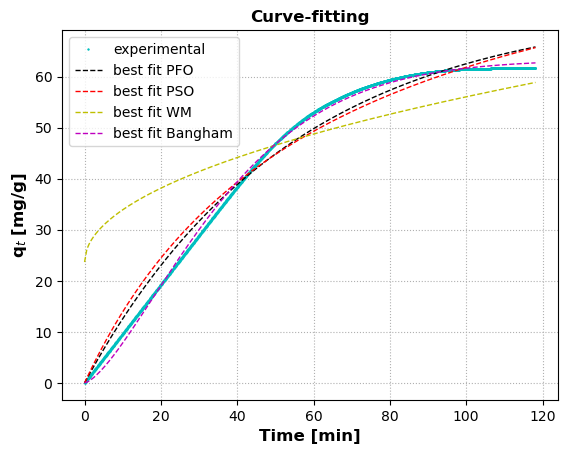

In [7]:
# define the size of the figure
fig, ax = plt.subplots()

# plot experimental data
plt.plot(xData, yData, 'c+', mfc = "none", label='experimental', markersize=1)

# plot fitted data
ax.plot(x_eval, best_PFO, 'k--', label='best fit PFO', linewidth = 1)
ax.plot(x_eval, best_PSO, 'r--', label='best fit PSO', linewidth = 1)
ax.plot(x_eval, best_WM, 'y--', label='best fit WM', linewidth = 1)
ax.plot(x_eval, best_Bangham, 'm--', label='best fit Bangham', linewidth = 1)

# edit plot
ax.legend()
ax.set_xlabel("Time [min]", fontsize=12, fontweight='bold')
ax.set_ylabel("q$_t$ [mg/g]", fontsize=12, fontweight='bold')
ax.set_title("Curve-fitting", fontsize=12, fontweight='bold', loc = 'center')
ax.grid(linestyle = ':')
fig.tight_layout

In [8]:
aic_df = pd.DataFrame({'model':['PFO', 'PSO', 'WM', 'Bangham'],
                       'aic':[result_PFO.aic, result_PSO.aic, 
                              result_WM.aic, result_Bangham.aic]})

aic_min = aic_df[aic_df['aic'] == aic_df['aic'].min()]

print('The best model is %s with aic value of %2f' %(aic_min.model.iloc[0], aic_min.aic.iloc[0]))

The best model is Bangham with aic value of -697.650711


*Note that reduced chi-square can also be used for assessing the models with lower value indicating better convergence*

Note that there is a notebook named 'Modified Arrhenius - Activation' Energy which provides information regarding 
the calculation of activation energy (Ea) by making use of Bangham rate constants obtained 
at 4 different adsorption temperatures.